# Análisis de datos, jugadores de futbol Estados Unidos vs México

In [2]:
import glob
import numpy as np
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import re

#### Se importan datos de un total de 18278 jugadores de futbol del 2020.

In [3]:
fifa2020=pd.read_csv("./datos/players_20.csv")

In [31]:
fifa2020.shape

(18278, 104)

## Primer filtrado de dados  

### Se filtran los datos que se utilizarán en el análisis pasando de 104 columnas a 13

In [7]:
fifa2020_filtro= fifa2020[["short_name", "age", "height_cm", "weight_kg", "nationality", "club", "overall", "potential", "value_eur",
                 "wage_eur", "player_positions", "power_jumping", "power_long_shots"]]

### Filtro Jugadores de Mexicanos 

In [8]:
mexico=fifa2020_filtro[fifa2020_filtro["nationality"] == "Mexico"]

In [32]:
mexico.shape

(340, 13)

In [177]:
mexico

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,power_jumping,power_long_shots
209,C. Vela,30,177,77,Mexico,Los Angeles FC,83,83,24500000,17000,"RW, LW, CAM",65,84
255,H. Lozano,23,175,70,Mexico,PSV,82,86,29000000,26000,"RW, LW",67,74
291,H. Herrera,29,185,80,Mexico,Atlético Madrid,82,82,21500000,70000,CM,76,78
363,J. Corona,26,173,62,Mexico,FC Porto,81,82,21000000,19000,"RM, RB",72,67
381,A. Guardado,32,169,67,Mexico,Real Betis,81,81,13500000,32000,"CM, CDM, LM",74,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18133,J. García,21,186,72,Mexico,Santos Laguna,50,62,40000,1000,GK,64,9
18168,R. Hernández,30,173,71,Mexico,Tiburones Rojos de Veracruz,50,50,30000,1000,CM,55,37
18215,R. Miranda,20,174,65,Mexico,Atlético de San Luis,49,61,50000,1000,CM,52,34
18221,J. Rodríguez,20,179,74,Mexico,FC Juárez,49,59,40000,2000,CB,71,23


### Filtro jugadores de EUA 

In [9]:
estados_U=fifa2020_filtro[fifa2020_filtro["nationality"] == "United States"]

In [35]:
estados_U.shape

(347, 13)

In [10]:
estados_U

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,power_jumping,power_long_shots
583,C. Pulisic,20,177,69,United States,Chelsea,79,86,18000000,85000,"LW, RW",78,58
629,J. Brooks,26,193,78,United States,VfL Wolfsburg,79,82,14000000,46000,CB,73,29
1264,T. Adams,20,176,68,United States,RB Leipzig,76,86,11500000,28000,"CDM, RWB",83,46
1267,W. McKennie,20,185,84,United States,FC Schalke 04,76,86,12500000,21000,"CM, CB, CAM",92,68
1292,Z. Steffen,24,191,86,United States,Fortuna Düsseldorf,76,84,8500000,18000,GK,71,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,J. Akanyirige,17,180,73,United States,San Jose Earthquakes,51,75,80000,1000,CB,74,23
17954,B. Reynolds,18,191,77,United States,FC Dallas,51,73,80000,1000,"ST, CAM",60,42
18067,J. Haak,17,184,75,United States,New York City FC,50,73,60000,1000,CM,58,39
18109,D. Louicius,18,180,65,United States,Hobro IK,50,66,60000,1000,ST,59,44


## ¿Qué pais tiene los mejores jugadores? 

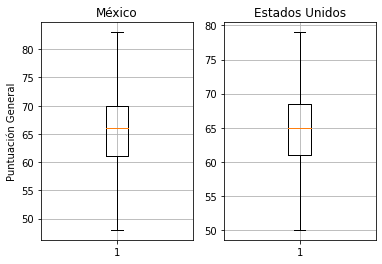

In [288]:
plt.figure()

plt.subplot(121)
plt.boxplot(mexico["overall"])
plt.ylabel("Puntuación General")
plt.title("México")
plt.grid(True)

plt.subplot(122)
plt.boxplot(estados_U["overall"])
plt.title("Estados Unidos")
plt.grid(True)

In [67]:
print(mexico["overall"].describe())

count    340.000000
mean      65.808824
std        6.366990
min       48.000000
25%       61.000000
50%       66.000000
75%       70.000000
max       83.000000
Name: overall, dtype: float64


In [68]:
print(estados_U["overall"].describe())

count    347.000000
mean      64.530259
std        5.824612
min       50.000000
25%       61.000000
50%       65.000000
75%       68.500000
max       79.000000
Name: overall, dtype: float64


#### Podemos observar con la gráfica anterior que ambos paices tiene jugadores de un nivel muy similar.

## ¿qué país tiene los jugadores mejor valorados?

## México 

In [38]:
mexico["value_eur"].describe()

count    3.400000e+02
mean     1.832441e+06
std      3.370611e+06
min      0.000000e+00
25%      3.250000e+05
50%      6.750000e+05
75%      1.700000e+06
max      2.900000e+07
Name: value_eur, dtype: float64

Text(0.5, 1.0, 'Valor en 10x7 de millones de Euros - México')

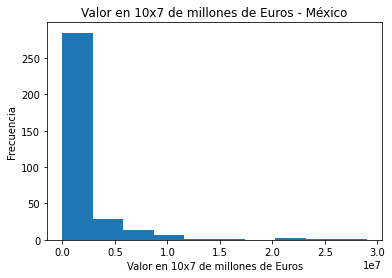

In [41]:
plt.hist(mexico["value_eur"])
plt.xlabel("Valor en 10x7 de millones de Euros")
plt.ylabel("Frecuencia")
plt.title("Valor en 10x7 de millones de Euros - México")



In [17]:
masvaluado_mx = mexico[mexico["value_eur"] > 15000000]
masvaluado_mex= masvaluado_mx[["short_name","club","overall" , "age", "value_eur"]]

In [18]:
masvaluado_mex

,short_name,club,overall,age,value_eur
209,C. Vela,Los Angeles FC,83,30,24500000
255,H. Lozano,PSV,82,23,29000000
291,H. Herrera,Atlético Madrid,82,29,21500000
363,J. Corona,FC Porto,81,26,21000000
555,R. Jiménez,Wolverhampton Wanderers,80,28,15500000


## Estados Unidos

In [19]:
estados_U["value_eur"].describe()

count    3.470000e+02
mean     1.185173e+06
std      2.004974e+06
min      4.000000e+04
25%      2.800000e+05
50%      5.500000e+05
75%      1.100000e+06
max      1.800000e+07
Name: value_eur, dtype: float64

Text(0.5, 1.0, 'Valor en 10x7 de millones de Euros - Estados Unidos')

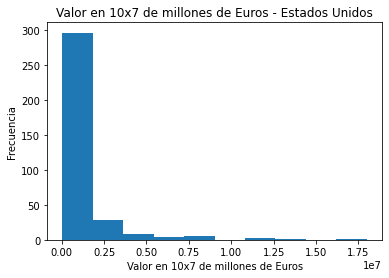

In [20]:
plt.hist(estados_U["value_eur"])
plt.xlabel("Valor en 10x7 de millones de Euros")
plt.ylabel("Frecuencia")
plt.title("Valor en 10x7 de millones de Euros - Estados Unidos")


In [44]:
masvaluado_EU = estados_U[estados_U["value_eur"] > 15000000]
masvaluado_EUA= masvaluado_EU[["short_name","club","overall" , "age", "value_eur"]]

In [45]:
masvaluado_EUA

,short_name,club,overall,age,value_eur
583,C. Pulisic,Chelsea,79,20,18000000


## Relación entre edad y valoración 

### México 

<AxesSubplot:xlabel='age', ylabel='value_eur'>

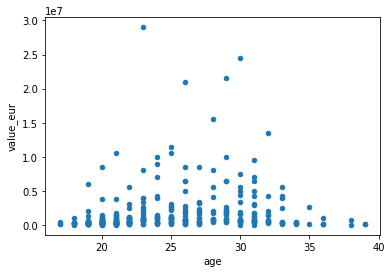

In [48]:
mexico.plot(kind = "scatter", x = "age", y = "value_eur")

### Estados Unidos 

<AxesSubplot:xlabel='age', ylabel='value_eur'>

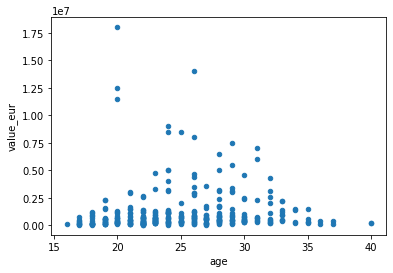

In [49]:
estados_U.plot(kind = "scatter", x = "age", y = "value_eur")

## Evolución de los 9 mejores jugadores Mexicanos del 2020 en los ultimos 6 años y predicción 2021

In [4]:
files=glob.glob("./datos/*.csv")

In [37]:
files

['./players_16.csv',
 './players_19.csv',
 './players_18.csv',
 './players_17.csv',
 './players_15.csv',
 './players_20.csv']

In [38]:
date=[]
date_=[]
files_=[]

for i,file in enumerate(files):
    date.append(re.findall(r'\d+',file)[0])


temp=sorted(range(len(date)), key=date.__getitem__)

for i in temp:
    date_.append(date[i])
    print(date[i],files[i])
    files_.append(files[i])

15 ./players_15.csv
16 ./players_16.csv
17 ./players_17.csv
18 ./players_18.csv
19 ./players_19.csv
20 ./players_20.csv


In [69]:
for i,file in enumerate(files_):
    data=pd.read_csv(file)
    data=data[1:]
    data=data[data['nationality']=="Mexico"][1:]
    jugador=data.groupby(['long_name']).sum()
   
    if i==0 :
        if 'overall' in jugador.columns:
            df_jugador = pd.DataFrame(jugador['overall'])
    else:
        if 'overall' in jugador.columns:
            df_jugador[date_[i]]=jugador['overall']
       

In [57]:
 df_jugador

,overall,16,17,18,19,20
long_name,,,,,,
Aarón Fernández,61,62.0,61.0,65.0,NaN,NaN
Aarón Galindo Rubio,67,69.0,70.0,NaN,NaN,NaN
Abraham Darío Carreño Rohan,65,66.0,NaN,NaN,NaN,NaN
Adrian Marín,62,62.0,63.0,NaN,NaN,NaN
Adrián Alexei Aldrete Rodríguez,67,70.0,70.0,69.0,69.0,70.0
...,...,...,...,...,...,...
Óscar Pérez Rojas,69,70.0,71.0,71.0,71.0,NaN
Óscar Ricardo Rojas García,63,70.0,70.0,69.0,NaN,NaN
Óscar Salvador Vera Anguiano,63,65.0,NaN,66.0,NaN,NaN


In [58]:
xfiltro_mx =   df_jugador[ df_jugador["20"] < 100]
xfiltro_mx

,overall,16,17,18,19,20
long_name,,,,,,
Adrián Alexei Aldrete Rodríguez,67,70.0,70.0,69.0,69.0,70.0
Alan Omar Mendoza López,58,NaN,NaN,68.0,67.0,67.0
Alberto Joshimar Acosta Alvarado,64,65.0,66.0,65.0,66.0,66.0
Aldo Rocha,60,62.0,67.0,70.0,70.0,70.0
Alfonso Blanco Antúnez,64,65.0,66.0,66.0,69.0,69.0
...,...,...,...,...,...,...
Yosgart Ernesto Gutiérrez Serna,61,62.0,63.0,61.0,61.0,63.0
Ángel Baltazar Sepúlveda Sánchez,63,68.0,69.0,70.0,69.0,70.0
Ángel Eduardo Reyna Martínez,71,70.0,NaN,NaN,NaN,68.0


In [59]:
mejor_mx =  xfiltro_mx[xfiltro_mx["20"] >80]
mejor_mx

,overall,16,17,18,19,20
long_name,,,,,,
Hirving Rodrigo Lozano Bahena,70,74.0,76.0,78.0,80.0,82.0
Héctor Miguel Herrera López,76,77.0,80.0,79.0,81.0,82.0
Jesús Corona,69,NaN,80.0,81.0,81.0,81.0
José Andrés Guardado Hernández,76,80.0,82.0,80.0,NaN,81.0
